In [ ]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras import Model 
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [ ]:
# # use for google Colab

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# use for google Colab
!ls /content/drive/MyDrive/Regex_CNN_Project/dataset # check the folder TRAIN and TEST show using ls / dir  

In [ ]:
# use for google Colab
!cd /content/drive/MyDrive/Regex_CNN_Project

In [ ]:
data_dir = '/content/drive/MyDrive/Regex_CNN_Project/dataset/' # use for google Colab
# data_dir = './dataset/'
train_dir = data_dir + 'TRAIN'
test_dir = data_dir + 'TEST'
# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
batch_size = 32
num_epochs = 32
num_classes = 6  #categories of trash

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1.0/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True,rotation_range=30, validation_split=0.2,
width_shift_range=0.2, height_shift_range=0.2)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='training')

valid_data = train_data_gen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical",subset='validation')

test_data = test_data_gen.flow_from_directory(test_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode="categorical")


Found 1603 images belonging to 6 classes.
Found 398 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_data.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [ ]:
train_data.image_shape

(224, 224, 3)

In [ ]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

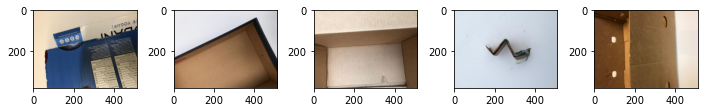

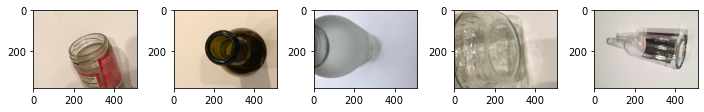

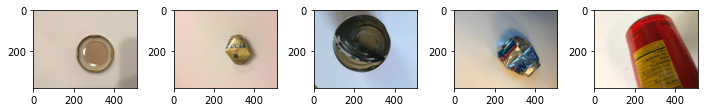

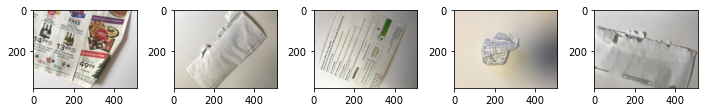

In [ ]:
for k in train_data.class_indices.keys():
    plot_imgs(train_dir+'/' + k)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

vgg16 = VGG16(input_shape = input_shape, weights = "imagenet", include_top = False)
for layer in vgg16.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 16s 0us/step


In [ ]:

x = layers.Flatten()(vgg16.output)
# now let's add output layers or prediction layer

prediction = layers.Dense(units = num_classes, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = num_epochs, steps_per_epoch=len(train_data))

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("VGG16 Training and Validation Accuracy")
plt.plot(num_epochs,result.history["accuracy"], label='Training Accuracy')
plt.plot(result..history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.plot(num_epochs, result.history["loss"], label='Training Loss')
plt.plot(num_epochs, result.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('VGG16 Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# model.save('project_vgg.h5')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model1 = InceptionV3(input_shape = input_shape, include_top = False, weights = 'imagenet')

In [ ]:
for layer in model1.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
x = layers.Flatten()(model1.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
prediction1 = layers.Dense(6, activation='sigmoid')(x)

model1 = tf.keras.models.Model(inputs = model1.input, outputs=prediction1)

model1.summary()

In [ ]:
model1.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

result1 = model1.fit(train_data, validation_data=valid_data, epochs = 32, steps_per_epoch = len(train_data))

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Inception Training and Validation Accuracy")
plt.plot( result1.history["accuracy"], label='Training Accuracy')
plt.plot( result1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot( result1.history["loss"], label='Training Loss')
plt.plot( result1.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model1.save('project_incept.h5')